In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


penguins = sns.load_dataset("penguins")

def snake_case(column_name):
    return column_name.strip().replace(' ', '_').lower()
penguins.rename(columns=snake_case, inplace=True)

In [2]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Text(0, 0.5, 'Body Mass (g)')

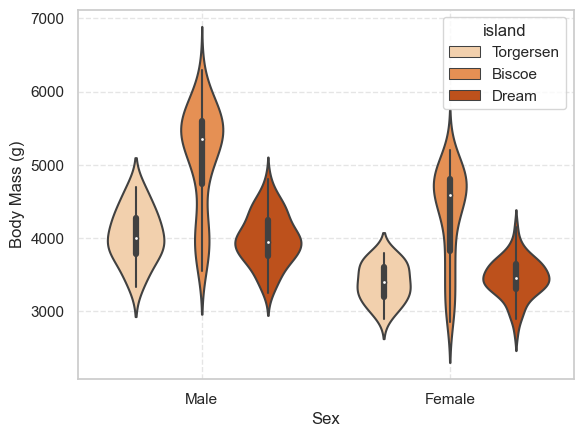

In [49]:
sns.set_theme(style="whitegrid")
sns.violinplot(x = "sex", y = "body_mass_g", data = penguins, hue = "island", palette = "Oranges")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Sex")
plt.ylabel("Body Mass (g)")


/Users/katebecker/anaconda3/envs/squirrelgurlz/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


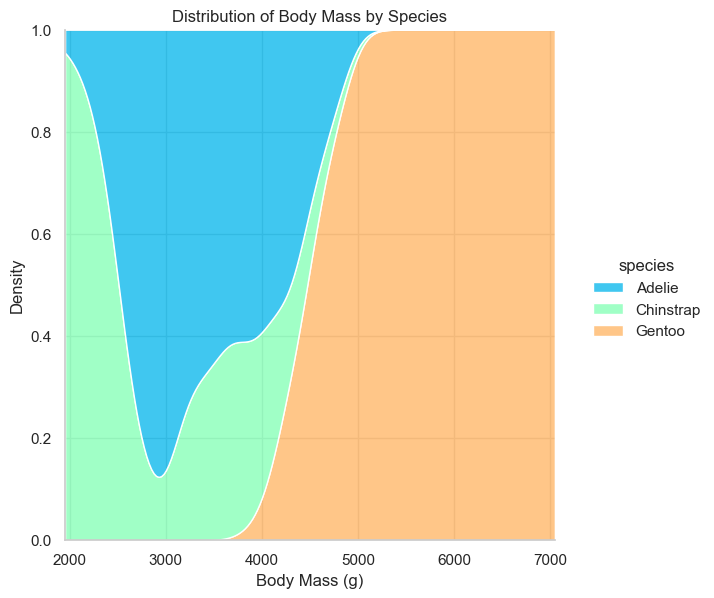

In [26]:
sns.set_theme(style="whitegrid")

displot = sns.displot(
    data=penguins,
    x="body_mass_g", hue="species",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="rainbow",
)

displot.set(title = "Distribution of Body Mass by Species")
displot.set_axis_labels(x_var = "Body Mass (g)")

#Did not set x limits to begin at 0 because there is no data for body mass below 2000g

Text(0.5, 0.98, 'Variable Relationships and Distribution By Species')

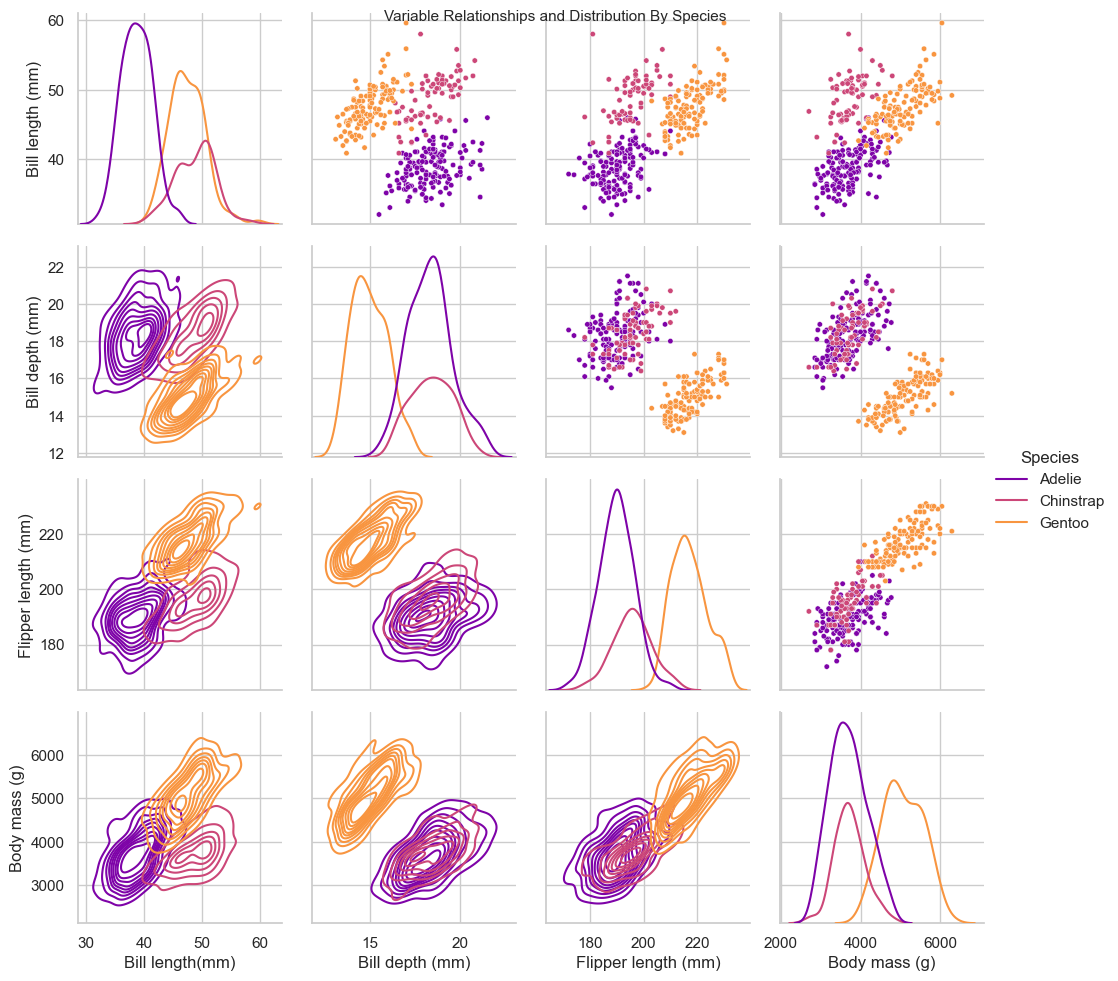

In [10]:
sns.set_theme(style="whitegrid")

df = sns.load_dataset("penguins")

g = sns.PairGrid(df, diag_sharey=False, hue = "species", palette= "plasma")
g.map_upper(sns.scatterplot, s=15, edgecolor = 'w')
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=1.5)
g.add_legend(title="Species")

g.axes[0, 0].set_ylabel("Bill length (mm)")
g.axes[1, 0].set_ylabel("Bill depth (mm)")
g.axes[2, 0].set_ylabel("Flipper length (mm)")
g.axes[3, 0].set_ylabel("Body mass (g)")
g.axes[3, 0].set_xlabel("Bill length(mm)")
g.axes[3, 1].set_xlabel("Bill depth (mm)")
g.axes[3, 2].set_xlabel("Flipper length (mm)")
g.axes[3, 3].set_xlabel("Body mass (g)")

g.fig.suptitle("Variable Relationships and Distribution By Species", fontsize =11)

